# 01_evaluation_KNN

1. Utwórz DummyClassifier dla zbioru danych wine. 

<br> Podziel dane używając train_test_split
<br> Oblicz accuracy (score)
2. Zapisz model i wczytaj go używając joblib 

3. Utwórz KNNClassifier (wszystko jak w pkt.1). 

Dodatkowo używając for loop dla n_neighbors od 1 do 10:

<br>utwórz 2 krzywe (na jednym wykresie) z wartości score dla zbioru testowego oraz treningowego
<br>sprawdź w jaki sposób wpływa standaryzacja na wyniki (utwórz nowy wykres)
4. Porównaj wyniki pkt 1 vs 3
<br>wskaż, która wartość n_neighbors jest najlepsza
<br>wskaż czy standaryzacja wpłynęła na wynik.


Rozwiązanie prześlij jako printscreen.
Nazwa pliku (bez polskich znaków):

Nazwisko_Imie_01.jpg



In [1]:
import sklearn
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler

import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X, y = load_wine()['data'], load_wine()['target']
df = pd.DataFrame(columns=['Model', 'Score'])

# 1

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=21)

In [4]:
dataset_scores = []

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
print(dummy_clf.score(X_test, y_test))

df1 = pd.DataFrame({'Model':"DummyClassifier" ,'Score':round(dummy_clf.score(X_test, y_test)*100,2)},index = [0])
df =pd.concat([df,df1],ignore_index=True)

0.3559322033898305


# 2

In [5]:
import joblib
filename = 'finalized_model.sav'
joblib.dump(dummy_clf, filename)

['finalized_model.sav']

In [6]:
# load the model from disk
loaded_model = joblib.load(filename)
result = loaded_model.score(X_test, y_test)
print(result)

0.3559322033898305


# 3

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=21)

test_score = []
train_score = []
neighbours = []

In [8]:
for i in range(1,11):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    print(f'Score for {i} neighbours {round(knn.score(X_test, y_test)*100,2)}%')
    test_score.append(round(knn.score(X_test, y_test)*100,2))
    train_score.append(round(knn.score(X_train, y_train)*100,2))
    neighbours.append(i)
    
    df1 = pd.DataFrame({'Model':f'Knn {i}' ,'Score':round(knn.score(X_test, y_test)*100,2)},index = [0])
    df =pd.concat([df,df1],ignore_index=True)

Score for 1 neighbours 77.97%
Score for 2 neighbours 66.1%
Score for 3 neighbours 72.88%
Score for 4 neighbours 71.19%
Score for 5 neighbours 77.97%
Score for 6 neighbours 67.8%
Score for 7 neighbours 69.49%
Score for 8 neighbours 66.1%
Score for 9 neighbours 69.49%
Score for 10 neighbours 66.1%


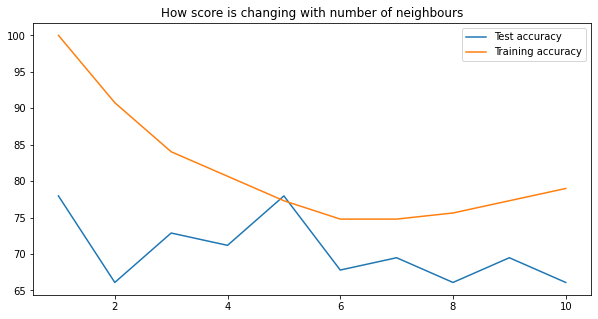

In [9]:
plt.figure(figsize=(10,5))
plt.plot(neighbours, test_score, label = "Test accuracy")
plt.plot(neighbours, train_score, label = "Training accuracy")
plt.title("How score is changing with number of neighbours")
plt.legend()
plt.show()

In [10]:
test_score_std = []
train_score_std = []

In [11]:
scaler = StandardScaler().fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

for i in range(1,11):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train_std, y_train)
    print(f'Score for {i} neighbours {round(knn.score(X_test_std, y_test)*100,2)}%')
    test_score_std.append(round(knn.score(X_test_std, y_test)*100,2))
    train_score_std.append(round(knn.score(X_train_std, y_train)*100,2))
    
    df1 = pd.DataFrame({'Model':f'Knn std {i}' ,'Score':round(knn.score(X_test_std, y_test)*100,2)},index = [0])
    df =pd.concat([df,df1],ignore_index=True)

Score for 1 neighbours 100.0%
Score for 2 neighbours 98.31%
Score for 3 neighbours 98.31%
Score for 4 neighbours 96.61%
Score for 5 neighbours 96.61%
Score for 6 neighbours 98.31%
Score for 7 neighbours 96.61%
Score for 8 neighbours 96.61%
Score for 9 neighbours 96.61%
Score for 10 neighbours 96.61%


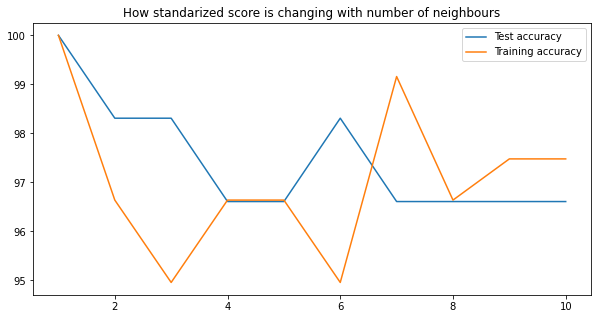

In [12]:
plt.figure(figsize=(10,5))
plt.plot(neighbours, test_score_std, label = "Test accuracy")
plt.plot(neighbours, train_score_std, label = "Training accuracy")
plt.title("How standarized score is changing with number of neighbours")
plt.legend()
plt.show()

# 4

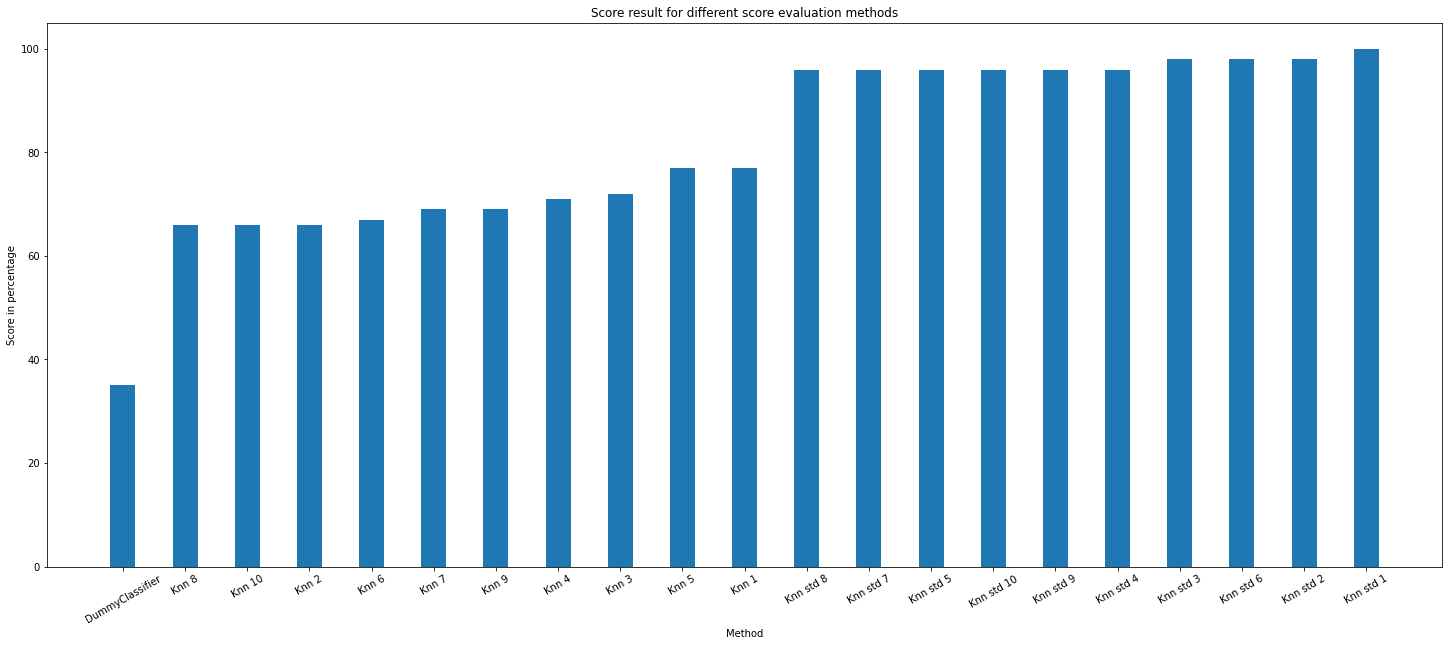

In [13]:
df['Score'] = df['Score'].apply(np.floor)
df = df.sort_values(by=['Score'])

fig = plt.figure(figsize = (25, 10))
plt.bar(df.Model, df.Score,
        width = 0.4)
plt.title("Score result for different score evaluation methods")
plt.xlabel("Method")
plt.ylabel("Score in percentage")
plt.xticks(rotation = 30)
plt.show()

Dummy Classifier gives way lower accuracy results then Knn Classifier.
<br>
<br>Standardization has increased the accuracy. 
<br>
<br>For both standardized and non standardized data it appears that less neighbors the better, so the highest results are having only 1 neighbor.